___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# AR(p)
# Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html'>ar_model.AR</a></strong><font color=black>(endog[, dates, freq, missing])</font>&nbsp;&nbsp;Autoregressive AR(p) model<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ARResults.html'>ar_model.ARResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an AR model</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/AR.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive models</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Autoregressive_model'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive model</font></div>

## Perform standard imports and load datasets
For this exercise we'll look at monthly U.S. population estimates in thousands from January 2011 to December 2018 (96 records, 8 years of data). Population includes resident population plus armed forces overseas. The monthly estimate is the average of estimates for the first of the month and the first of the following month.
Source: https://fred.stlouisfed.org/series/POPTHM

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults


In [2]:
# Load the U.S. Population dataset
df = pd.read_csv('../Data/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [3]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


## Plot the source data

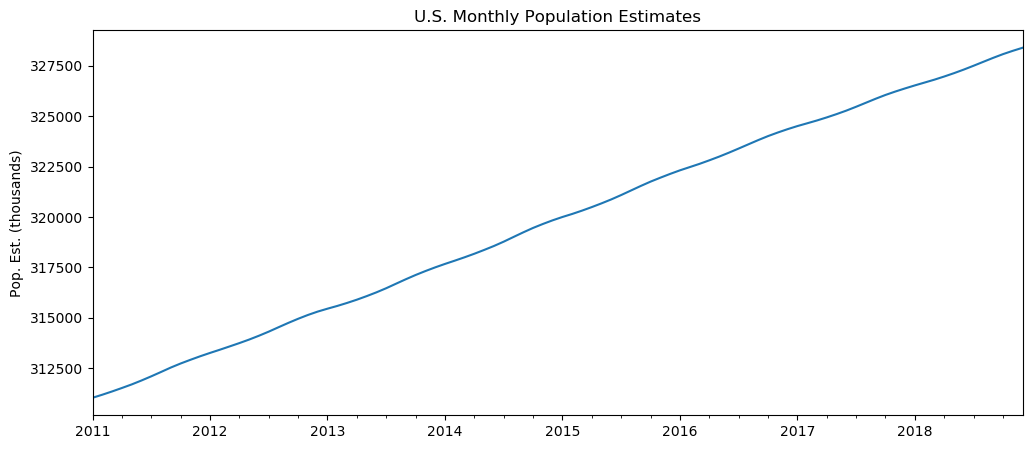

In [4]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='' # we don't really need a label here

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Split the data into train/test sets
The goal in this section is to:
* Split known data into a training set of records on which to fit the model
* Use the remaining records for testing, to evaluate the model
* Fit the model again on the <em>full</em> set of records
* Predict a future set of values using the model

As a general rule you should set the length of your test set equal to your intended forecast size. That is, for a monthly dataset you might want to forecast out one more year. Therefore your test set should be one year long.

<div class="alert alert-info"><strong>NOTE: </strong>For many training and testing applications we would use the <tt>train_test_split()</tt> function available from Python's <a href='https://scikit-learn.org/stable/'>scikit-learn</a> library. This won't work here as <tt>train_test_split()</tt> takes <em>random samples</em> of data from the population.</div>

In [5]:
len(df)

96

In [6]:
# Set one year for testing
train = df.iloc[:84]
test = df.iloc[84:]

## Fit an AR(1) Model

In [25]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [26]:
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.85923D+00    |proj g|=  1.02742D+00

At iterate    1    f=  6.75878D+00    |proj g|=  2.55863D+00
  ys=-1.531E+00  -gs= 1.027E+00 BFGS update SKIPPED

At iterate    2    f=  6.70426D+00    |proj g|=  1.00804D+00

At iterate    3    f=  6.69606D+00    |proj g|=  8.60774D-02

At iterate    4    f=  6.69600D+00    |proj g|=  1.25970D-03

At iterate    5    f=  6.69600D+00    |proj g|=  3.48166D-05

At iterate    6    f=  6.69600D+00    |proj g|=  3.53992D-03

At iterate    7    f=  6.69600D+00    |proj g|=  4.70521D-03

At iterate    8    f=  6.69600D+00    |proj g|=  2.64659D-03

At iterate    9    f=  6.69600D+00    |proj g|=  9.87566D-04

At iterate   10    f=  6.69600D+00    |proj g|=  2.79607D-03

At iterate   11    f=  6.69600D+00    |proj g|=  7.98384D-03

At iterate   12    f=  6.69600D+00  

 This problem is unconstrained.


<div class="alert alert-info"><strong>NOTE: </strong>There's a slight difference between the object returned by the Holt-Winters Exponential Smoothing <tt>.fit()</tt> method and that returned by AR. The Holt-Winters object uses <tt>.forecast()</tt> for predicted values, while AR uses <tt>.predict()</tt>.</div>

In [27]:
AR1fit.aic

10.530922249214628

In [28]:
AR1fit.params

const        124.450047
L1.PopEst      0.999609
dtype: float64

In [29]:
#start=len(train)
#start

In [30]:
#end=len(train)+len(test)-1
#end

In [31]:
#AR1fit.predict(start=start, end=end, dynamic=False)

In [32]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [33]:
predictions1

2018-01-01    326374.719475
2018-02-01    326371.440234
2018-03-01    326368.162276
2018-04-01    326364.885601
2018-05-01    326361.610209
2018-06-01    326358.336098
2018-07-01    326355.063269
2018-08-01    326351.791720
2018-09-01    326348.521452
2018-10-01    326345.252464
2018-11-01    326341.984755
2018-12-01    326338.718325
Freq: MS, Name: AR(1) Predictions, dtype: float64

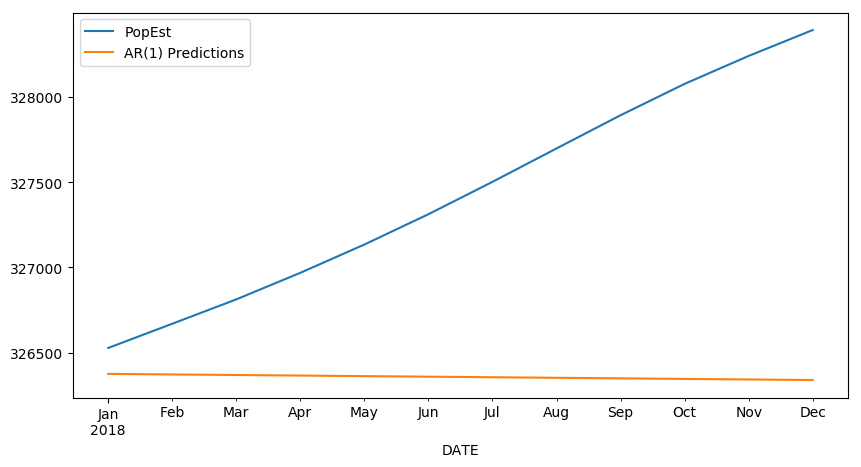

In [34]:
test.plot(figsize=(10,5),legend=True)
predictions1.plot(figsize=(10,5),legend=True)

In [38]:
# Comparing predictions to expected values
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326374.7195, expected=326527
predicted=326371.4402, expected=326669
predicted=326368.1623, expected=326812
predicted=326364.8856, expected=326968
predicted=326361.6102, expected=327134
predicted=326358.3361, expected=327312
predicted=326355.0633, expected=327502
predicted=326351.7917, expected=327698
predicted=326348.5215, expected=327893
predicted=326345.2525, expected=328077
predicted=326341.9848, expected=328241
predicted=326338.7183, expected=328393


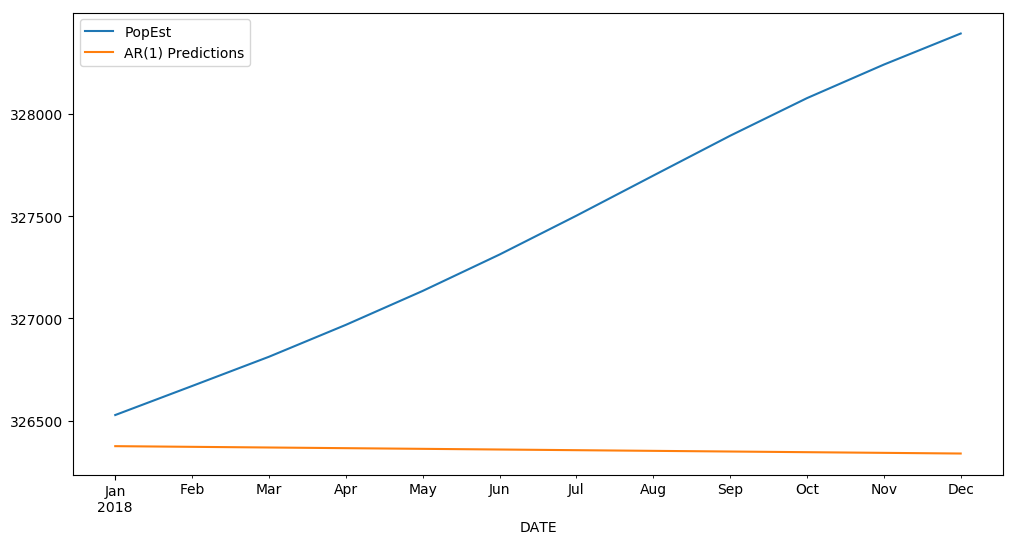

In [39]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

## Fit an AR(2) Model

In [40]:
# Recall that our model was already created above based on the training set
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04080D+00    |proj g|=  4.02474D+00

At iterate    1    f=  4.93559D+00    |proj g|=  2.59698D+00

At iterate    2    f=  4.91429D+00    |proj g|=  6.83651D-01

At iterate    3    f=  4.90992D+00    |proj g|=  7.04788D-01

At iterate    4    f=  4.86422D+00    |proj g|=  2.30778D+00

At iterate    5    f=  4.79593D+00    |proj g|=  4.38700D+00

At iterate    6    f=  4.67105D+00    |proj g|=  6.37074D+00

At iterate    7    f=  4.49645D+00    |proj g|=  6.85922D+00

At iterate    8    f=  4.21106D+00    |proj g|=  4.16714D+00

At iterate    9    f=  4.10896D+00    |proj g|=  4.65950D-01

At iterate   10    f=  4.08273D+00    |proj g|=  5.42126D-02

At iterate   11    f=  4.06456D+00    |proj g|=  2.43225D-01

At iterate   12    f=  4.05868D+00    |proj g|=  2.13735D-01

At iterate   13    f=  4.0

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


In [41]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

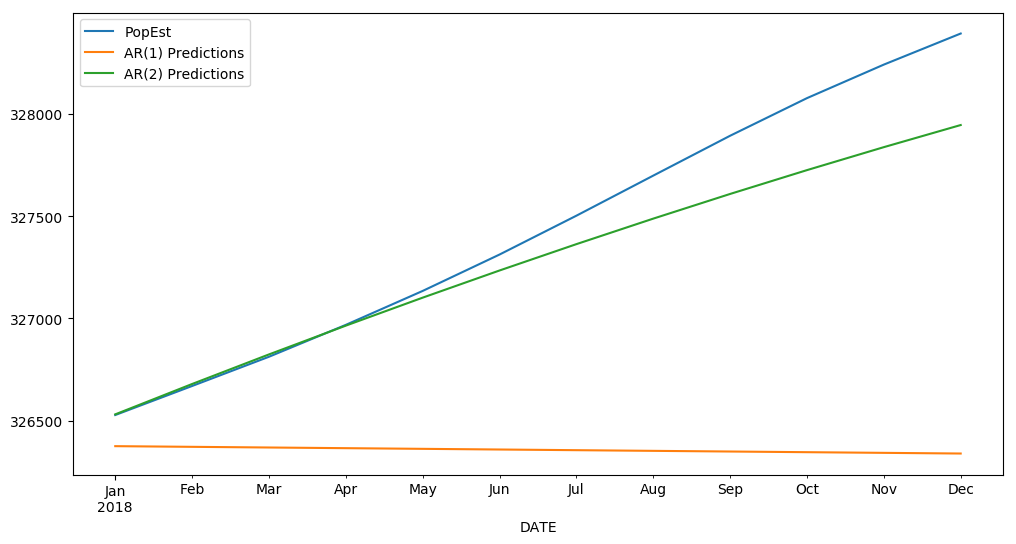

In [42]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

## Fit an AR(p) model where statsmodels chooses p
This time we'll omit the <tt>maxlag</tt> argument in <tt>AR.fit()</tt> and let statsmodels choose a p-value for us.

In [44]:
# if maxlag is not specified it's "none" and the model will determine the best number of lags
#ARfit = model.fit(method='mle')
ARfit = model.fit(ic='t-stat')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 8
Coefficients:
const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64


In [45]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

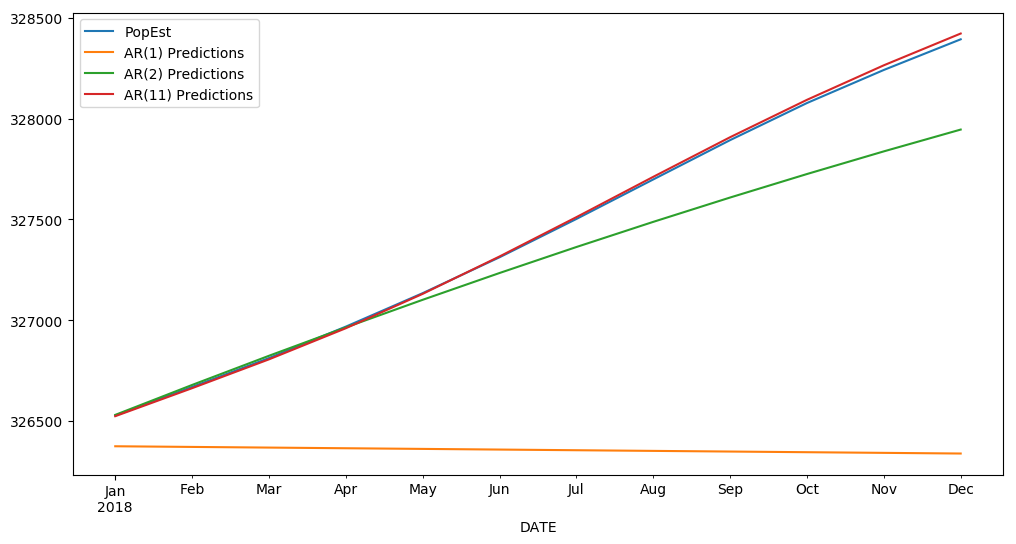

In [46]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

In [48]:
# video calls it 8 because of the 8 lags the notebook called it 11 , but its same
#predictions8 = ARfit.predict(start,end)
#predictions8 = predictions8.rename('AR(8) Predictions')

## Evaluate the Model
It helps to have a means of comparison between two or more models. One common method is to compute the Mean Squared Error (MSE), available from scikit-learn.

In [47]:
from sklearn.metrics import mean_squared_error

/Users/diana/anaconda3/envs/mod-b/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [51]:
# AR(11) is same with AR(above)
labels = ['AR(1)','AR(2)','AR(11)']
preds = [predictions1, predictions2, predictions11]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 1543080.593
AR(2) Error: 53287.77385
AR(11) Error: 186.9726361


We see right away how well AR(11) outperformed the other two models.

Another method is the <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> (AIC), which does a better job of evaluating models by avoiding overfitting.<br>
Fortunately this is available directly from the fit model object.

In [52]:
modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 10.531


ValueError: shapes (76,9) and (3,) not aligned: 9 (dim 1) != 3 (dim 0)

## Forecasting
Now we're ready to train our best model on the greatest amount of data, and fit it to future dates.

In [59]:
# First, retrain the model on the full dataset
model = AR(df['PopEst'])

# Next, fit the model
# you can also leave maxlag out and allow stats model to figure out the best maxlag (above was 8)
ARfit = model.fit(maxlag=8,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.15534D+00    |proj g|=  2.80932D+00

At iterate    1    f=  4.72899D+00    |proj g|=  2.63382D+00

At iterate    2    f=  4.70629D+00    |proj g|=  8.10032D-01

At iterate    3    f=  4.68018D+00    |proj g|=  8.77565D-01

At iterate    4    f=  4.57094D+00    |proj g|=  3.39494D+00

At iterate    5    f=  4.39238D+00    |proj g|=  6.78058D+00

At iterate    6    f=  4.21450D+00    |proj g|=  6.78011D+00

At iterate    7    f=  3.87370D+00    |proj g|=  5.91214D+00

At iterate    8    f=  3.78975D+00    |proj g|=  1.59035D+00

At iterate    9    f=  3.77032D+00    |proj g|=  4.90375D-01

At iterate   10    f=  3.76767D+00    |proj g|=  8.54676D-01

At iterate   11    f=  3.76416D+00    |proj g|=  3.96283D-01

At iterate   12    f=  3.75729D+00    |proj g|=  1.18897D+00

At iterate   13    f=  3.7

 This problem is unconstrained.


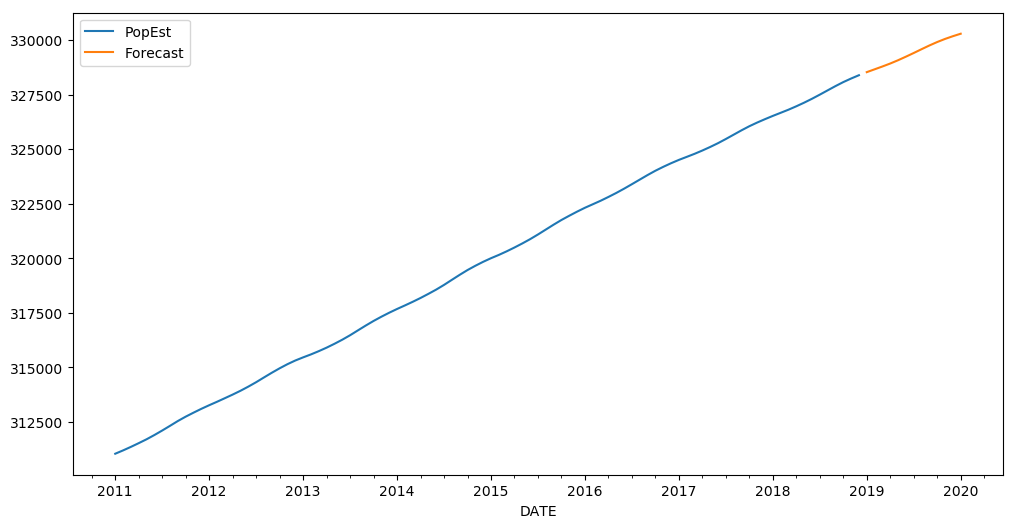

In [60]:

# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

## Great job!